In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, classification_report, confusion_matrix

### Part a

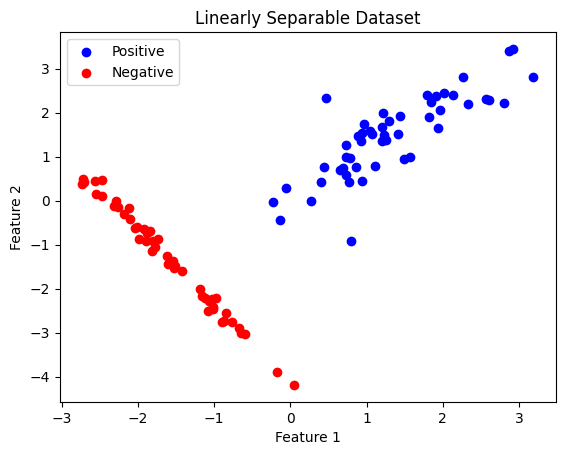

In [2]:
dataset, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=2, weights=[0.5,0.5], flip_y=0, class_sep=1.5, random_state=55)

y = np.where(y == 0, -1, 1)


plt.scatter(dataset[y == 1][:, 0], dataset[y == 1][:, 1], color='blue', label='Positive')
plt.scatter(dataset[y == -1][:, 0], dataset[y == -1][:, 1], color='red', label='Negative')
plt.legend()
plt.title("Linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [3]:
# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(dataset, y, test_size=0.4, random_state=55)

(x_train.shape, x_test.shape), (y_train.shape, y_test.shape)

(((60, 2), (40, 2)), ((60,), (40,)))

In [4]:
model= Perceptron(max_iter=5000,eta0=0.001,random_state=55)

In [5]:
model.fit(x_train,y_train)

Perceptron(eta0=0.001, max_iter=5000, random_state=55)

In [6]:
y_predict=model.predict(x_test)
print(y_predict)

[-1  1 -1 -1 -1  1  1  1 -1  1 -1  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1  1
  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1]


In [7]:
accuracy=accuracy_score(y_test ,y_predict)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [8]:
weights=model.coef_
bias=model.intercept_
print(weights,bias)

[[0.00134157 0.00129523]] [0.001]


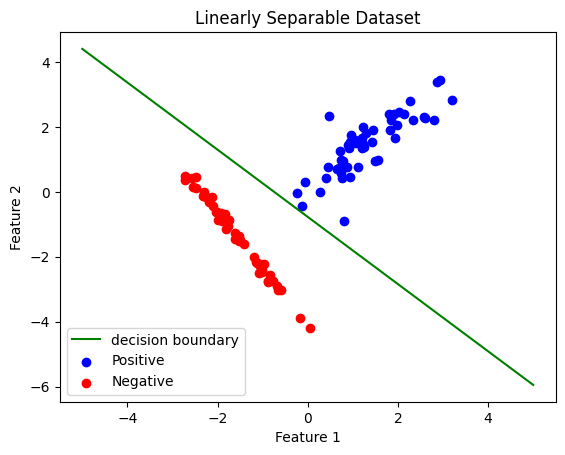

In [9]:
xx=np.linspace(-5,5,1000)
yy=(weights[0][0]*xx + bias)/(-1*weights[0][1])
plt.plot(xx, yy, color='green', label='decision boundary')
plt.scatter(dataset[y == 1][:, 0], dataset[y == 1][:, 1], color='blue', label='Positive')
plt.scatter(dataset[y == -1][:, 0], dataset[y == -1][:, 1], color='red', label='Negative')
plt.legend()
plt.title("Linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

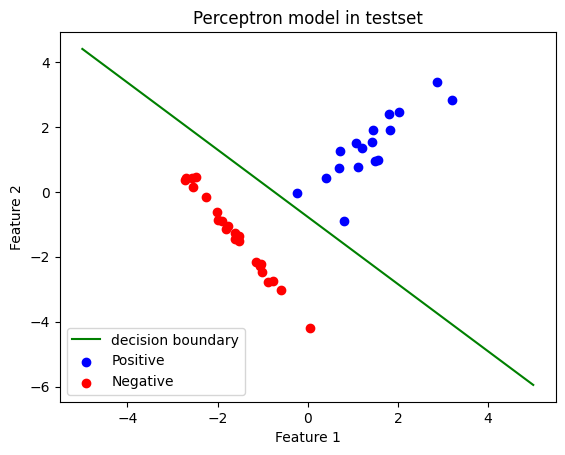

In [10]:
xx=np.linspace(-5,5,1000)
yy=(weights[0][0]*xx + bias)/(-1*weights[0][1])
plt.plot(xx, yy, color='green', label='decision boundary')
plt.scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1], color='blue', label='Positive')
plt.scatter(x_test[y_test == -1][:, 0], x_test[y_test == -1][:, 1], color='red', label='Negative')
plt.legend()
plt.title("Perceptron model in testset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Part b

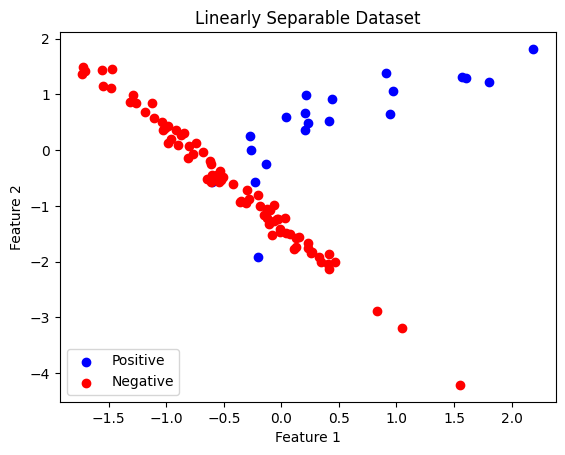

In [11]:
dataset_b, y_b = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=2, weights=[0.8,0.2], flip_y=0, class_sep=0.5, random_state=55)

y_b = np.where(y_b == 0, -1, 1)


plt.scatter(dataset_b[y_b == 1][:, 0], dataset_b[y_b == 1][:, 1], color='blue', label='Positive')
plt.scatter(dataset_b[y_b == -1][:, 0], dataset_b[y_b == -1][:, 1], color='red', label='Negative')
plt.legend()
plt.title("Linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [12]:
# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(dataset_b, y_b, test_size=0.4, random_state=55)

(x_train.shape, x_test.shape), (y_train.shape, y_test.shape)

(((60, 2), (40, 2)), ((60,), (40,)))

In [13]:
model_b= Perceptron(max_iter=5000,eta0=0.001,random_state=55)
model_b.fit(x_train,y_train)

Perceptron(eta0=0.001, max_iter=5000, random_state=55)

In [14]:
y_predict=model_b.predict(x_test)
print(y_predict)
accuracy=accuracy_score(y_test ,y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

[-1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1
  1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1]
Accuracy: 70.00%
Precision: 33.33%
Recall: 71.43%
F1 Score: 45.45%


In [15]:
print("\nClassification Report:")
print(classification_report(y_test, y_predict))


Classification Report:
              precision    recall  f1-score   support

          -1       0.92      0.70      0.79        33
           1       0.33      0.71      0.45         7

    accuracy                           0.70        40
   macro avg       0.63      0.71      0.62        40
weighted avg       0.82      0.70      0.73        40



In [16]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_predict))


Confusion Matrix:
[[23 10]
 [ 2  5]]


In [17]:
weights=model_b.coef_
bias=model_b.intercept_
print(weights,bias)

[[0.00250359 0.0018318 ]] [0.002]


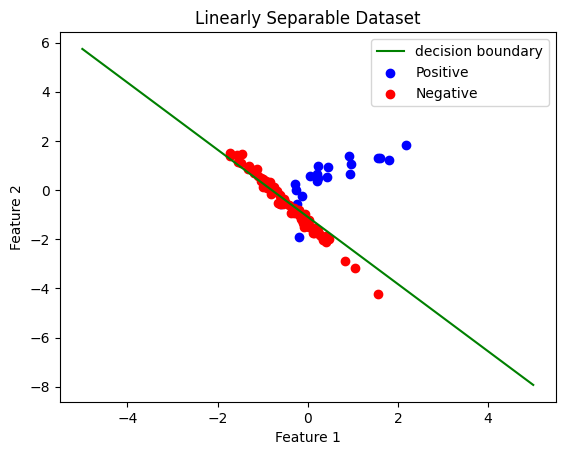

In [18]:
xx=np.linspace(-5,5,1000)
yy=(weights[0][0]*xx + bias)/(-1*weights[0][1])
plt.plot(xx, yy, color='green', label='decision boundary')
plt.scatter(dataset_b[y_b == 1][:, 0], dataset_b[y_b == 1][:, 1], color='blue', label='Positive')
plt.scatter(dataset_b[y_b == -1][:, 0], dataset_b[y_b == -1][:, 1], color='red', label='Negative')
plt.legend()
plt.title("Linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

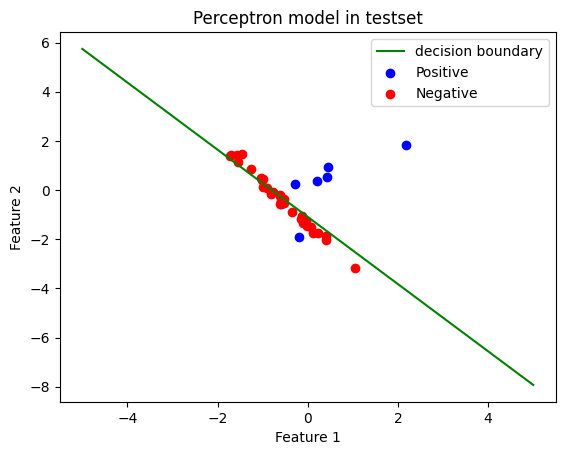

In [19]:
xx=np.linspace(-5,5,1000)
yy=(weights[0][0]*xx + bias)/(-1*weights[0][1])
plt.plot(xx, yy, color='green', label='decision boundary')
plt.scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1], color='blue', label='Positive')
plt.scatter(x_test[y_test == -1][:, 0], x_test[y_test == -1][:, 1], color='red', label='Negative')
plt.legend()
plt.title("Perceptron model in testset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()